# Inter-State Portability Transactions under ONORC(one nation one ration card) Plan during Sep 2024

Dataset Description:-
The dataset contains 385 rows and 7 columns, representing transaction data between different states in India.

Columns and Their Descriptions:-
homestatecode (int): Numeric code representing the home state.
salestatecode (int): Numeric code representing the sale state.
month (int): Month of the transaction (e.g., 9 for September).
year (int): Year of the transaction (e.g., 2024).
txn_count (int): Number of transactions recorded.
salestatename (str): Name of the state where the sale occurred.
homestatename (str): Name of the home state from where the transaction originated.

# 1) importing the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Reading the file

In [21]:
df = pd.read_csv("impds_sep_2024.csv")
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,9,2024,16,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,9,2024,47,JAMMU AND KASHMIR,HARYANA
2,7,1,9,2024,11,JAMMU AND KASHMIR,DELHI
3,8,1,9,2024,13,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,9,2024,4562,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
380,24,38,9,2024,609,Dadar & Nagar Haveli & Daman & Diu,GUJARAT
381,27,38,9,2024,559,Dadar & Nagar Haveli & Daman & Diu,MAHARASHTRA
382,29,38,9,2024,1,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
383,32,38,9,2024,1,Dadar & Nagar Haveli & Daman & Diu,KERALA


# 3) Get informatin about the datatype

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   homestatecode  385 non-null    int64 
 1   salestatecode  385 non-null    int64 
 2   month          385 non-null    int64 
 3   year           385 non-null    int64 
 4   txn_count      385 non-null    int64 
 5   salestatename  385 non-null    object
 6   homestatename  385 non-null    object
dtypes: int64(5), object(2)
memory usage: 21.2+ KB


# 4) shows first five rows

In [23]:
df.head()

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,9,2024,16,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,9,2024,47,JAMMU AND KASHMIR,HARYANA
2,7,1,9,2024,11,JAMMU AND KASHMIR,DELHI
3,8,1,9,2024,13,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,9,2024,4562,JAMMU AND KASHMIR,UTTAR PRADESH


# 5) Distribution of Transaction Counts

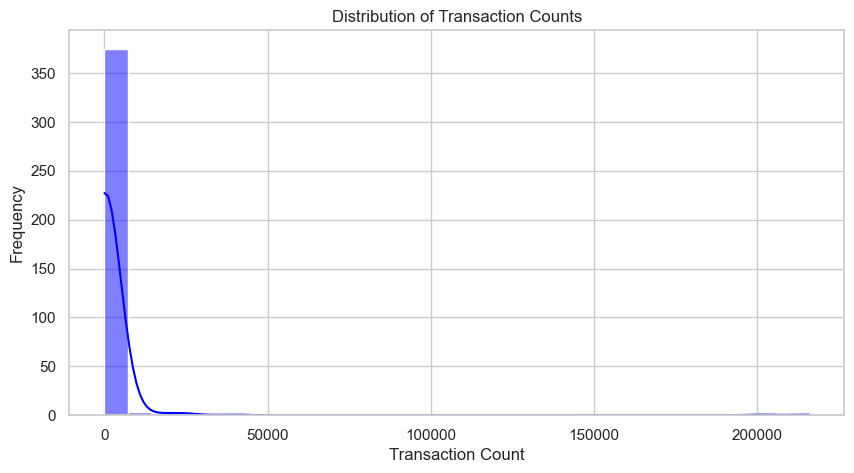

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(df['txn_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Counts')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()


# 6) Top States by Transactions

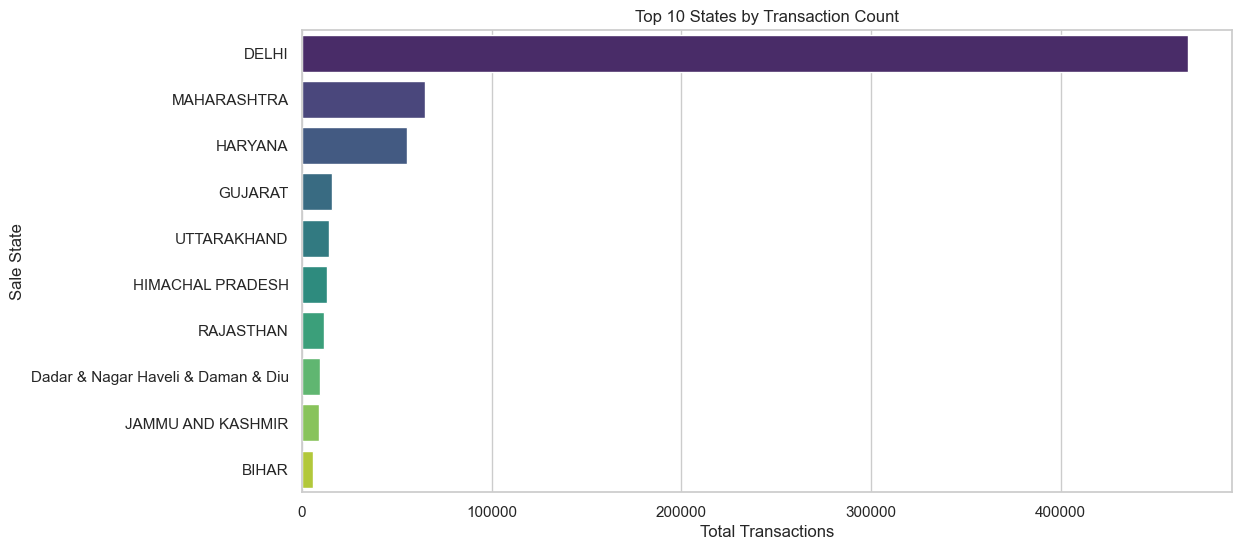

In [25]:
plt.figure(figsize=(12, 6))
top_states = df.groupby("salestatename")["txn_count"].sum().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette="viridis", legend=False)
plt.title('Top 10 States by Transaction Count')
plt.xlabel('Total Transactions')
plt.ylabel('Sale State')
plt.show()

# 7) Monthly Transaction Trend

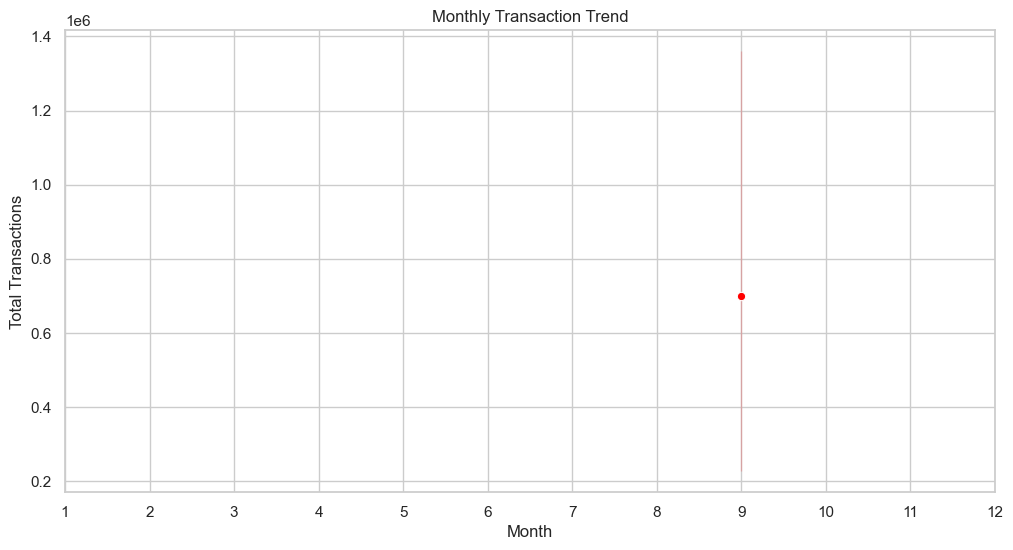

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="month", y="txn_count", estimator="sum",  marker='o', color='red')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.xticks(range(1, 13))
plt.show()

# 8) Transaction Count Distribution by Sale State

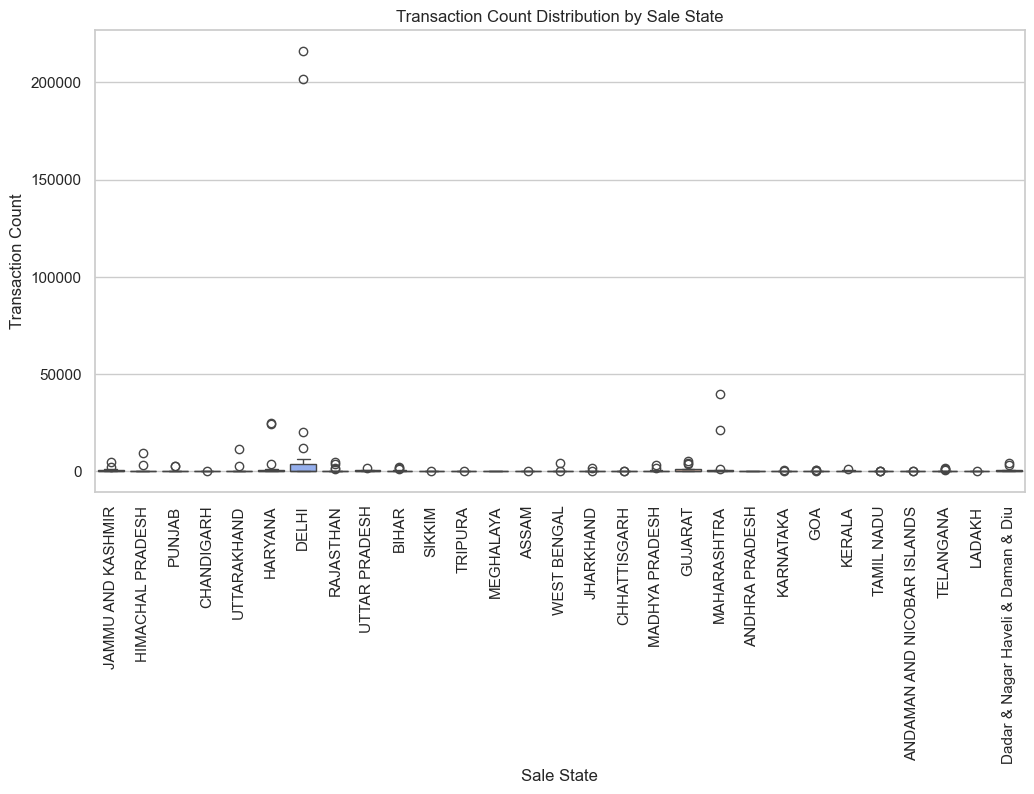

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="salestatename", y="txn_count", hue="salestatename", palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Transaction Count Distribution by Sale State")
plt.xlabel("Sale State")
plt.ylabel("Transaction Count")
plt.show()


# 9) Total Transactions by Year

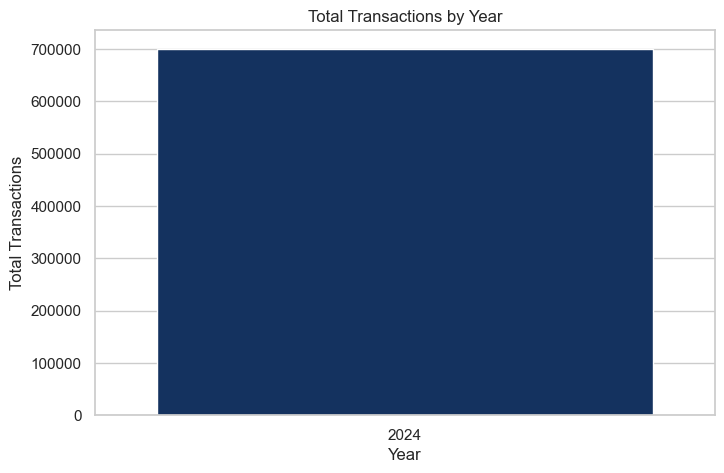

In [28]:
plt.figure(figsize=(8, 5))
yearly_txn = df.groupby("year")["txn_count"].sum().reset_index()
sns.barplot(data=yearly_txn, x="year", y="txn_count", hue="year", palette="Blues_r", legend=False)

plt.title("Total Transactions by Year")
plt.xlabel("Year")
plt.ylabel("Total Transactions")
plt.show()


# 10) Transactions vs. Month

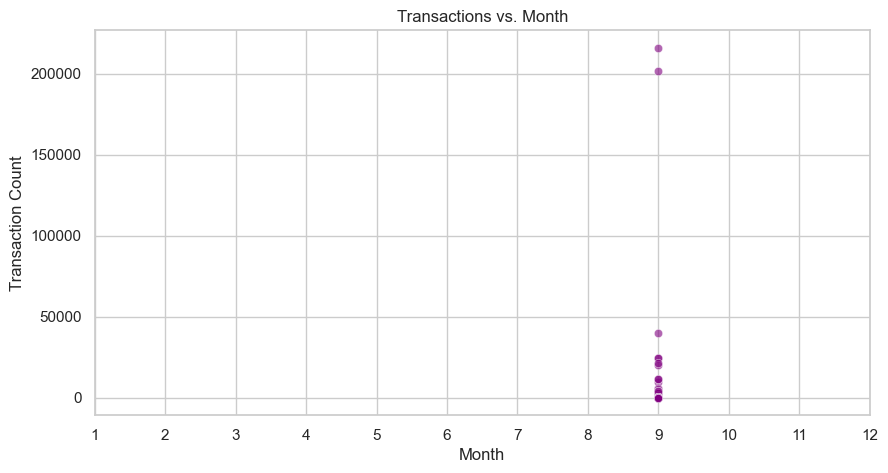

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="month", y="txn_count", alpha=0.6, color='purple')
plt.title("Transactions vs. Month")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.xticks(range(1, 13))
plt.show()

# 11) Transaction Count Distribution by Month

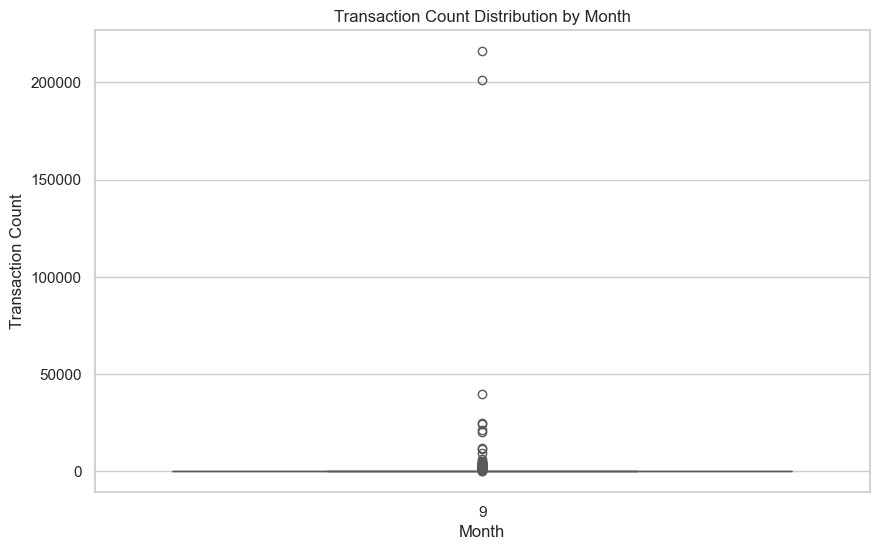

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="month", y="txn_count", hue="month", palette="Set2", legend=False)
plt.title("Transaction Count Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.show()


# 12) Transaction Count Distribution by Year

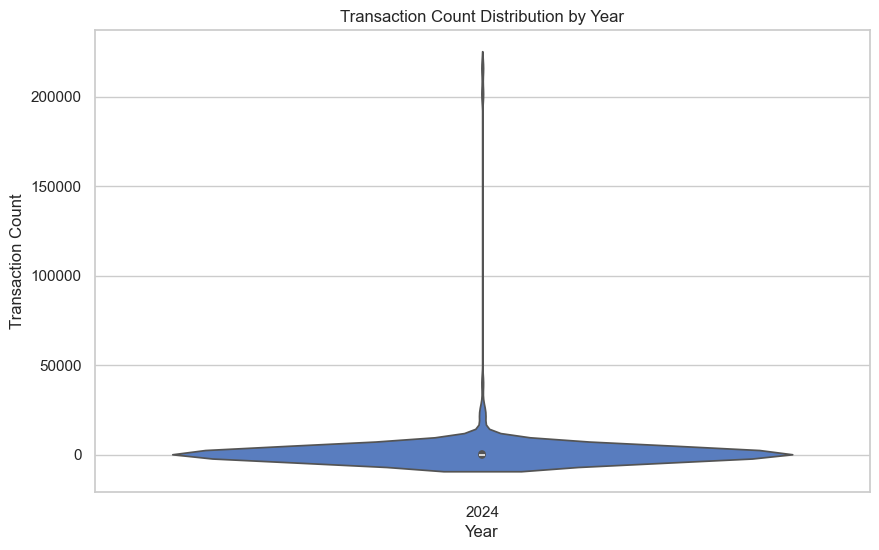

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="year", y="txn_count", hue="year", palette="muted", legend=False)
plt.title("Transaction Count Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.show()


# 13) Pairplot of Numeric Features

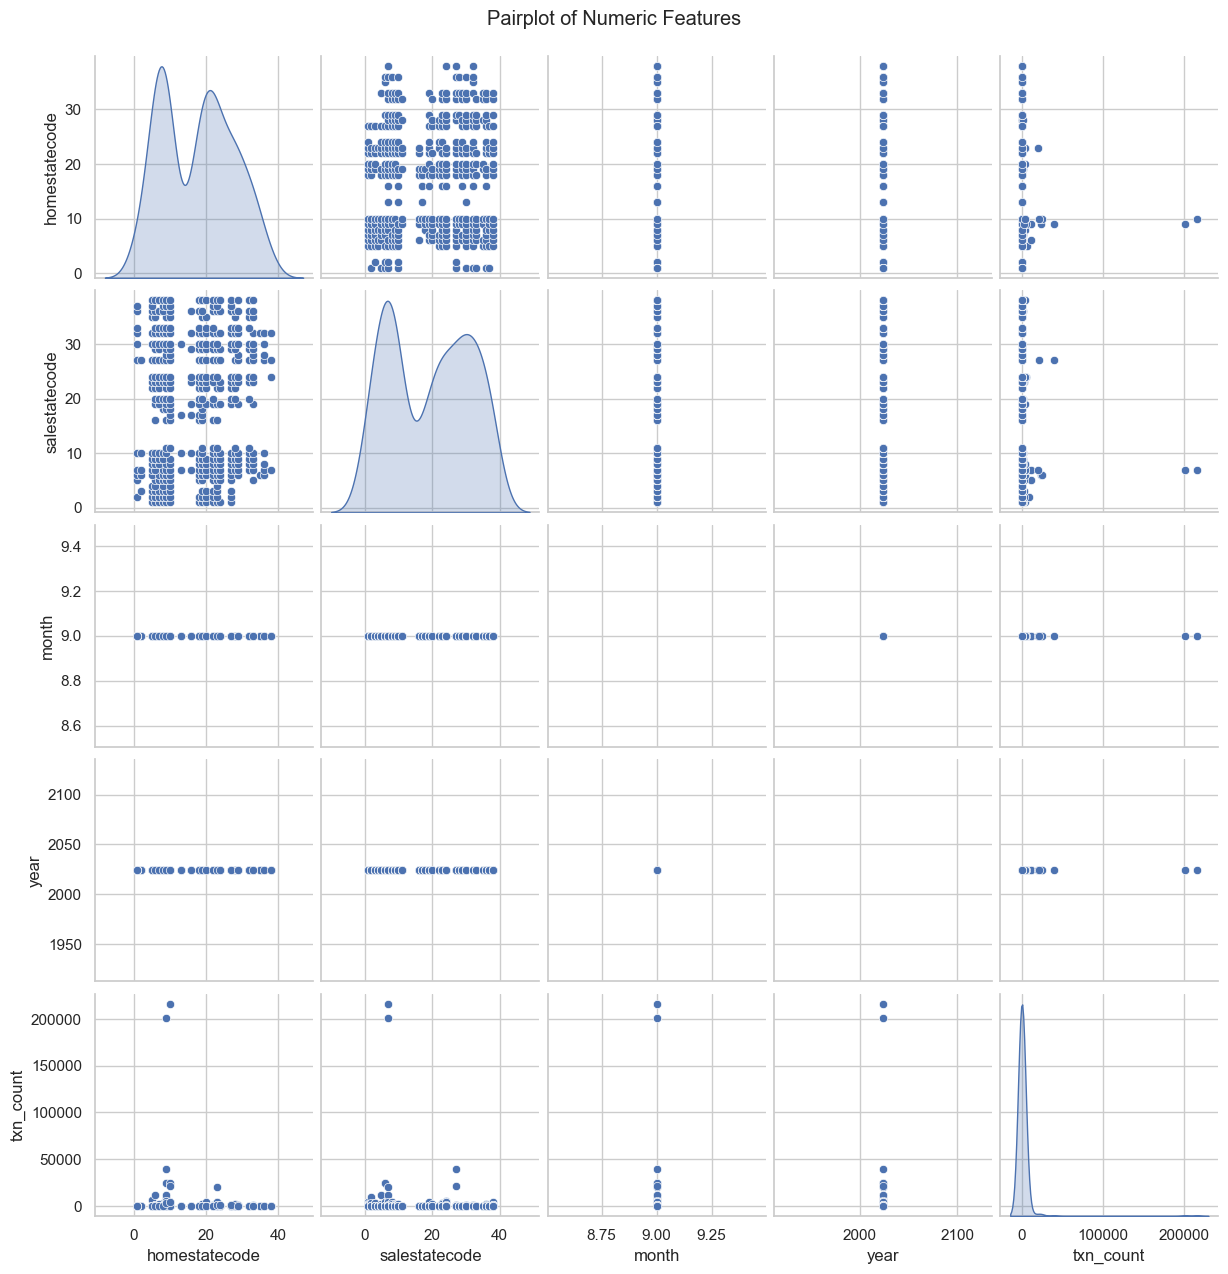

In [32]:
sns.pairplot(df, vars=["homestatecode", "salestatecode", "month", "year", "txn_count"], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# 14)  Pairplot of Numeric Features

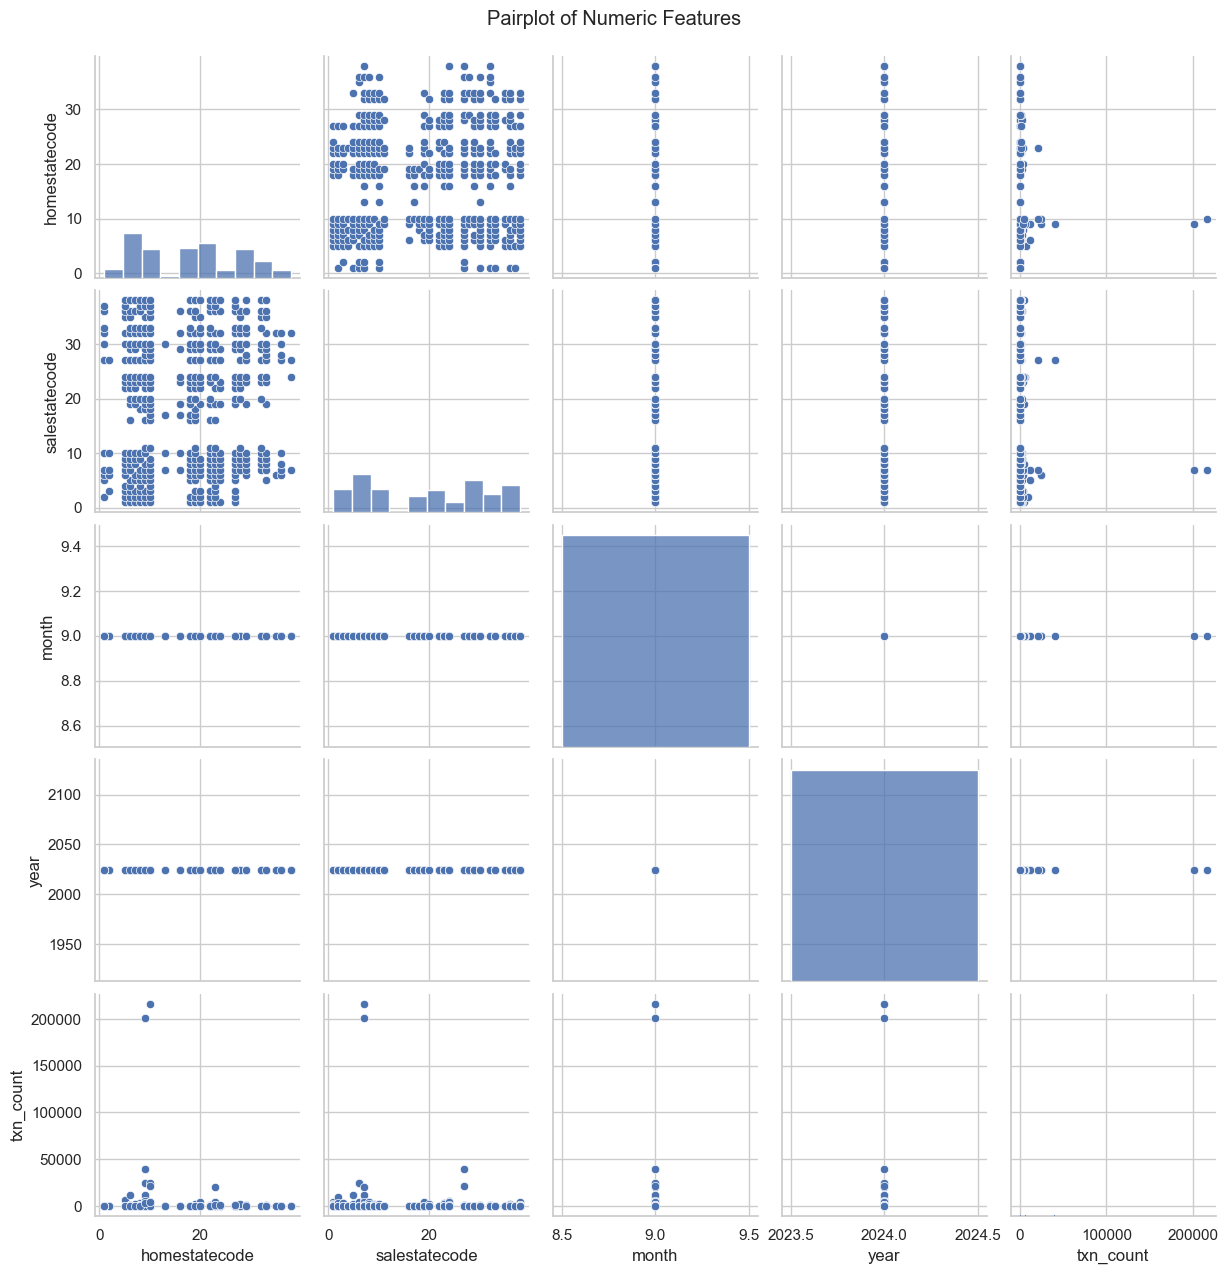

In [33]:
sns.pairplot(df, vars=["homestatecode", "salestatecode", "month", "year", "txn_count"], diag_kind="hist")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# 15) Top 10 Sale States by Transactions by using Pie Chart

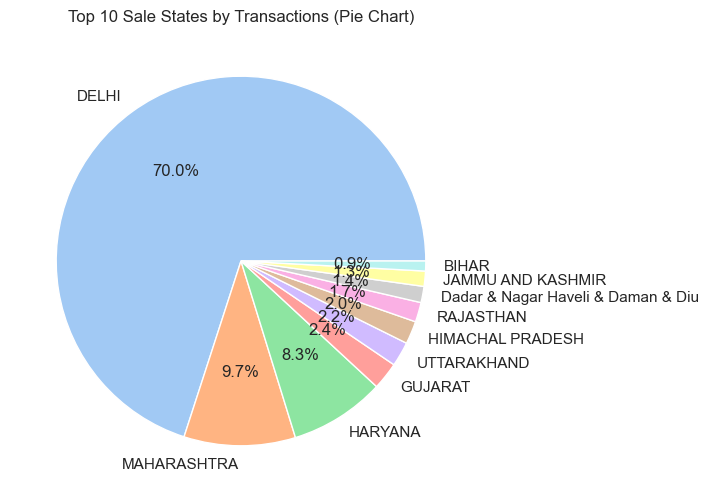

In [34]:
plt.figure(figsize=(10, 6))
top_states_pie = df.groupby("salestatename")["txn_count"].sum().nlargest(10)
plt.pie(top_states_pie, labels=top_states_pie.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Top 10 Sale States by Transactions (Pie Chart)")
plt.show()

#  16) Transaction Count by Sale State

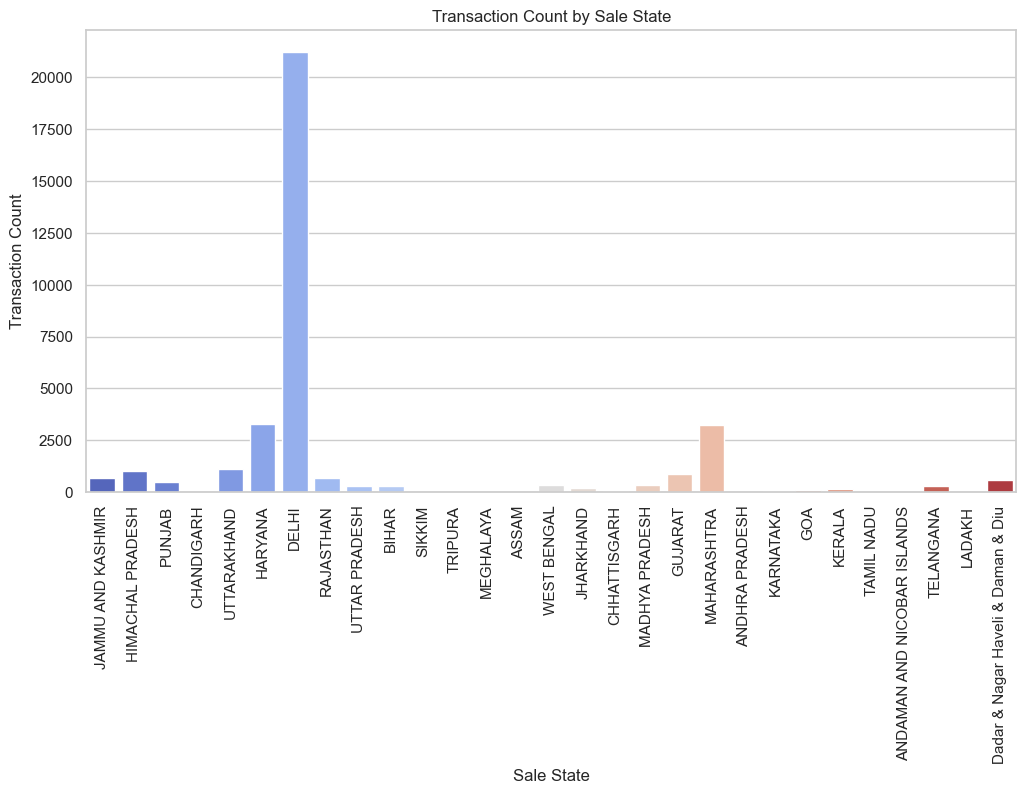

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="salestatename", y="txn_count", hue="salestatename", palette="coolwarm", errorbar=None, legend=False)
plt.xticks(rotation=90)
plt.title("Transaction Count by Sale State")
plt.xlabel("Sale State")
plt.ylabel("Transaction Count")
plt.show()


# 17)Kernel Density Estimate (KDE) of Transaction Counts

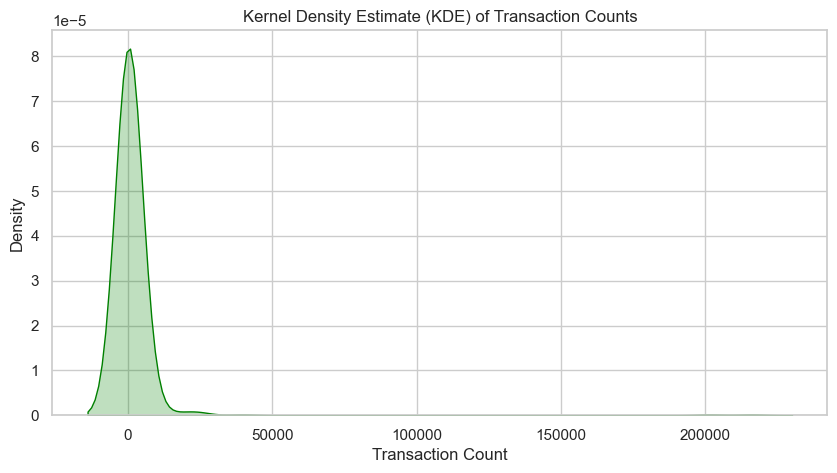

In [36]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df["txn_count"], fill=True, color="green")
plt.title("Kernel Density Estimate (KDE) of Transaction Counts")
plt.xlabel("Transaction Count")
plt.ylabel("Density")
plt.show()

# 18)Histogram of Transaction Counts

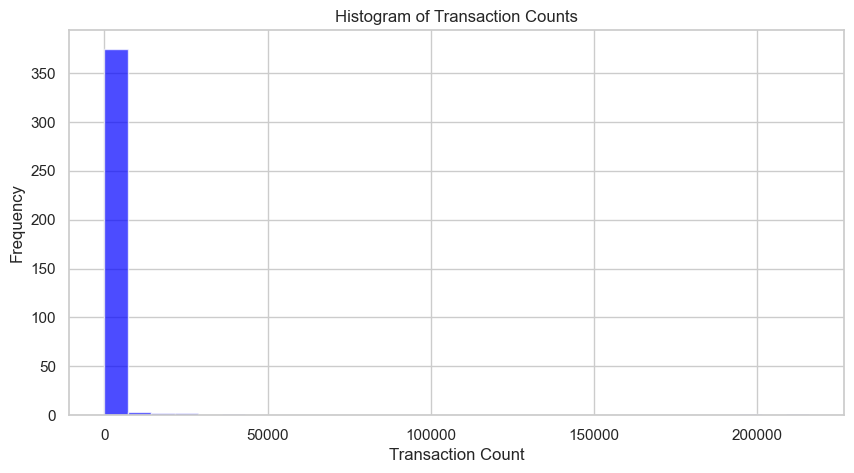

In [37]:
plt.figure(figsize=(10, 5))
plt.hist(df["txn_count"].dropna(), bins=30, color="blue", alpha=0.7)
plt.title("Histogram of Transaction Counts")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.show()

# 19)Transactions Over Time (Year-Month)

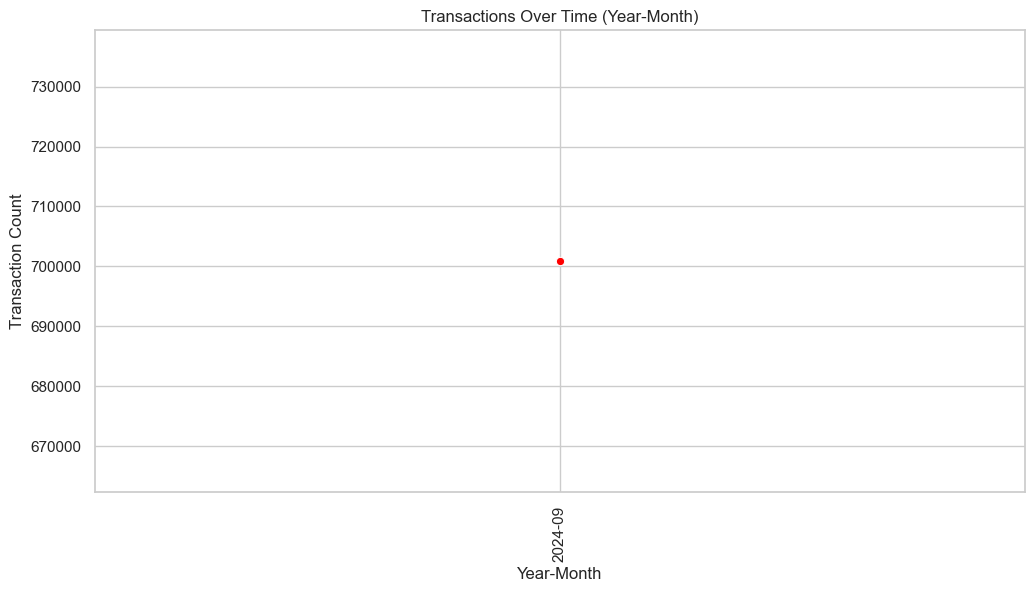

In [38]:
df["year_month"] = df["year"].astype(str) + "-" + df["month"].astype(str).str.zfill(2)
transactions_over_time = df.groupby("year_month")["txn_count"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_over_time, x="year_month", y="txn_count", marker="o", color="red")
plt.xticks(rotation=90)
plt.title("Transactions Over Time (Year-Month)")
plt.xlabel("Year-Month")
plt.ylabel("Transaction Count")
plt.show()

# 20)Average Transactions by Month

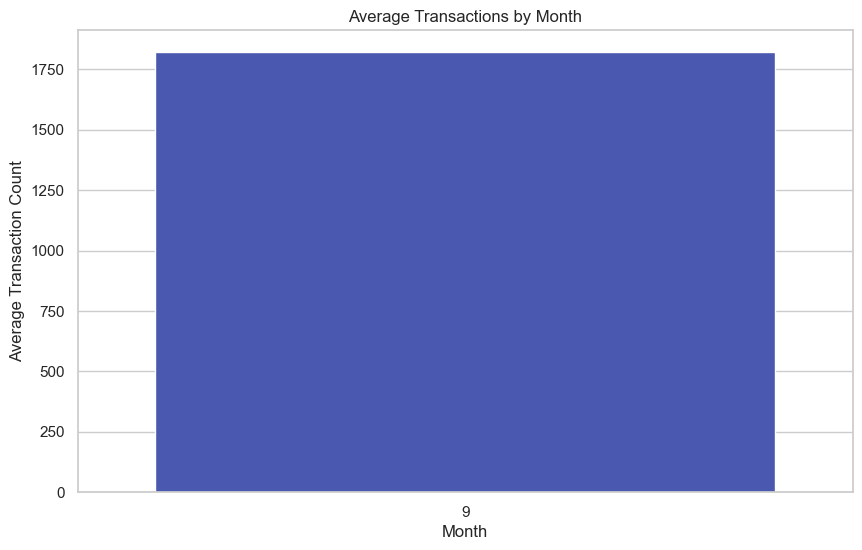

In [41]:
avg_txn_by_month = df.groupby("month")["txn_count"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_txn_by_month.index, y=avg_txn_by_month.values, hue=avg_txn_by_month.index, palette="coolwarm", legend=False)
plt.title("Average Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Average Transaction Count")
plt.show()


In [ ]:
df.tail(5

# 21) Shows which row has unique values 

In [42]:
df["txn_count"].unique()


array([    16,     47,     11,     13,   4562,   2220,      5,      7,
           54,    599,   1332,      1,      3,     37,    116,     28,
            9,   9517,   3324,      2,     21,     87,     18,    178,
           48,     30,     24,   2847,   2722,      4,     34,     38,
           22,    172,     15,  11493,   2439,     68,    272,    613,
         1281,  24254,  24741,     32,    138,    319,     65,   3893,
           14,     36,    136,   6289,  11836,   3589, 201503, 216040,
          361,   2114,   3710,    412,  20274,    171,    215,     10,
           56,    106,     17,    935,    173,   3897,   4643,     80,
           12,   1526,     91,    834,    811,     43,   1825,      6,
           58,    311,    497,     46,    966,   2050,    102,   1486,
          312,    148,     95,     97,    342,     27,    127,      8,
           44,     50,    249,   3980,     70,    112,   1735,     19,
          161,    264,     40,    131,     81,    141,    339,   2993,
      

# CONCLUSION

Conclusion for the Dataset Operations:-
Based on the various operations performed on the dataset, here are the key takeaways:


Dataset Cleaning & Inspection:-
The dataset was checked for missing values, data types, and inconsistencies.
No missing values were found, ensuring data completeness.
The dataset includes home state, sale state, month, year, and transaction counts.


Data Visualization:-
Histograms & KDE Plots: Analyzed the distribution of transaction counts.
Bar & Line Charts: Showed trends in transactions across months and years.
Box & Violin Plots: Revealed transaction count variations across states and time.
Heatmaps: Displayed relationships between home and sale states.

Statistical Analysis:-
T-test: Compared transaction counts between the two most active states (Delhi vs. Maharashtra).
Result: No statistically significant difference.
Chi-square Test: Assessed whether the transaction category (High/Low) varied by month.
Result: No significant association found

Final Insights:-
Transaction trends vary across states, but there’s no significant difference between top states.
Monthly patterns don’t significantly impact transaction counts when categorized as High/Low.
State-wise distributions show variance but no extreme outliers.